In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe_connected'
pio.renderers.default = 'iframe_connected'
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",None)

In [2]:
df=pd.read_csv(r"/content/products.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  30000 non-null  int64 
 1   CustomerID     30000 non-null  object
 2   Products       30000 non-null  object
 3   Timestamp      30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [4]:
df.shape

(30000, 4)

In [5]:
df.head()

,TransactionID,CustomerID,Products,Timestamp
0,1,C546,"Dish Sponge, Flatbread with Meat, Chips, Orange, Butter, Sausage, Cucumber, Rice, Ice Cream",2025-02-18
1,2,C385,"Onion, Juice, Flatbread with Meat, Chicken",2025-04-26
2,3,C292,"Egg, Flatbread with Meat, Banana, Pizza",2025-04-25
3,4,C863,"Ice Cream, Soda, Orange, Potato, Cereal, Chocolate, Cracker",2025-01-14
4,5,C171,"Ice Cream, Soap, Shampoo, Chicken, Banana, Beans, Cheese",2025-04-20


In [6]:
df["Product_List"] = df["Products"].str.split(",\s*")

In [7]:
df = df.explode("Product_List")

In [8]:
df.drop(columns=["Products","TransactionID"],inplace=True)

In [9]:
df.head()

,CustomerID,Timestamp,Product_List
0,C546,2025-02-18,Dish Sponge
0,C546,2025-02-18,Flatbread with Meat
0,C546,2025-02-18,Chips
0,C546,2025-02-18,Orange
0,C546,2025-02-18,Butter


In [10]:
df.isna().sum()
df.duplicated().sum()

np.int64(3981)

In [11]:
classifi_pr=df.groupby(["Product_List","Timestamp"]).size().reset_index(name="count")
classifi_pr

,Product_List,Timestamp,count
0,Apple,2025-01-01,32
1,Apple,2025-01-02,44
2,Apple,2025-01-03,33
3,Apple,2025-01-04,46
4,Apple,2025-01-05,50
...,...,...,...
4795,Yogurt,2025-04-26,46
4796,Yogurt,2025-04-27,40
4797,Yogurt,2025-04-28,32
4798,Yogurt,2025-04-29,38


In [12]:
fig = px.line(
    classifi_pr,
    x="Timestamp",
    y="count",
    color="Product_List",
    title="Product Sales Over Time",
    color_discrete_sequence=px.colors.qualitative.Vivid_r
)
fig.update_layout(
    xaxis_title="Timestamp",
    yaxis_title="Sales Count",
    xaxis_tickangle=90,
    plot_bgcolor="white",
    title_x=0.5,
    width=2000,
    height=400
)

fig.show()

In [13]:
customer_product = df.groupby(['CustomerID', 'Product_List']).size().unstack(fill_value=0)
customer_product = (customer_product > 0).astype(int)
customer_product

Product_List,Apple,Banana,Beans,Bread,Butter,Cereal,Cheese,Chicken,Chickpeas,Chips,...,Potato,Rice,Sausage,Shampoo,Soap,Soda,Strawberry,Tomato,Water,Yogurt
CustomerID,,,,,,,,,,,,,,,,,,,,,
C1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C1000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C101,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C995,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
C996,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
C997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
customer_product = df.groupby(['CustomerID', 'Product_List']).size().unstack(fill_value=0)
customer_product = (customer_product > 0).astype(int)
customer_product

Product_List,Apple,Banana,Beans,Bread,Butter,Cereal,Cheese,Chicken,Chickpeas,Chips,...,Potato,Rice,Sausage,Shampoo,Soap,Soda,Strawberry,Tomato,Water,Yogurt
CustomerID,,,,,,,,,,,,,,,,,,,,,
C1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C1000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C101,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C995,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
C996,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
C997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [15]:
pca = PCA(n_components=10)
customer_product_pca = pca.fit_transform(customer_product)
customer_product_pca

array([[ 0.02942523,  0.01216018,  0.00575105, ...,  0.00313894,
        -0.007583  , -0.00201012],
       [ 0.02942523,  0.01216018,  0.00575105, ...,  0.00313894,
        -0.007583  , -0.00201012],
       [-0.05607079,  0.02893396, -0.06849482, ..., -0.01911817,
         0.28194633, -0.05353708],
       ...,
       [ 0.02942523,  0.01216018,  0.00575105, ...,  0.00313894,
        -0.007583  , -0.00201012],
       [-0.03292261, -0.09411939, -0.0882516 , ..., -0.41163635,
         0.12224405,  0.18408624],
       [ 0.02942523,  0.01216018,  0.00575105, ...,  0.00313894,
        -0.007583  , -0.00201012]])

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_product['Cluster'] = kmeans.fit_predict(customer_product_pca)

In [17]:
cluster_products = customer_product.drop(columns='Cluster')
customer_product['Cluster'] = kmeans.labels_

# Calculate average product purchase per cluster
for cluster in sorted(customer_product['Cluster'].unique()):
    print(f"\nTop products in Cluster {cluster}:")
    top_products = cluster_products[customer_product['Cluster'] == cluster].mean().sort_values(ascending=False).head(10)
    print(top_products)


Top products in Cluster 0:
Product_List
Cheese        1.000000
Cereal        1.000000
Dumpling      1.000000
Chickpeas     1.000000
Strawberry    1.000000
Soda          1.000000
Lentil        0.997886
Detergent     0.997886
Orange        0.995772
Yogurt        0.995772
dtype: float64

Top products in Cluster 1:
Product_List
Apple        1.0
Banana       1.0
Bread        1.0
Butter       1.0
Cheese       1.0
Cereal       1.0
Chips        1.0
Chickpeas    1.0
Yogurt       1.0
Water        1.0
dtype: float64

Top products in Cluster 2:
Product_List
Apple        1.0
Banana       1.0
Beans        1.0
Butter       1.0
Chicken      1.0
Cereal       1.0
Cookie       1.0
Chickpeas    1.0
Tomato       1.0
Soda         1.0
dtype: float64

Top products in Cluster 3:
Product_List
Apple        1.0
Beans        1.0
Bread        1.0
Cereal       1.0
Chicken      1.0
Cheese       1.0
Chips        1.0
Chickpeas    1.0
Water        1.0
Tomato       1.0
dtype: float64

Top products in Cluster 4:
Product_

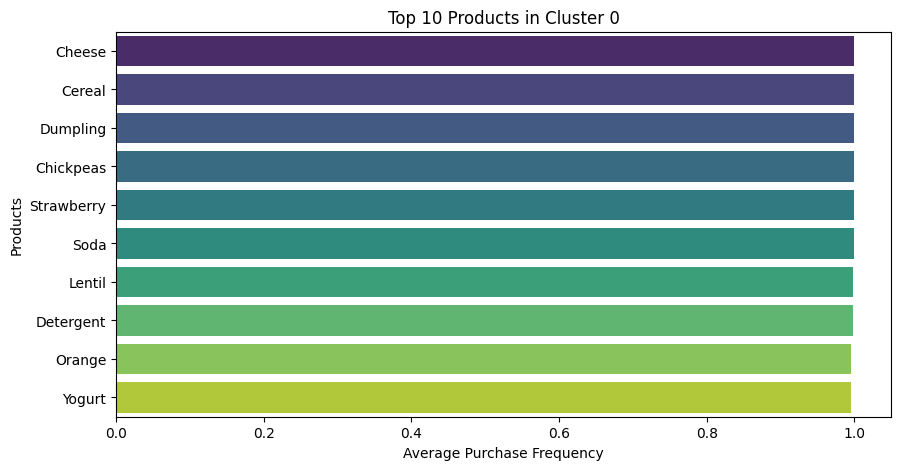

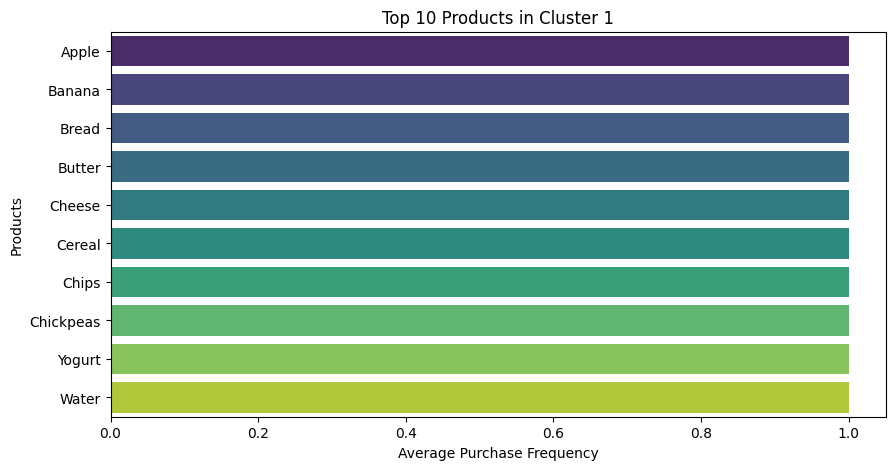

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot top products in a cluster
def plot_top_products(cluster_id, top_n=10):
    top_products = cluster_products[customer_product['Cluster'] == cluster_id].mean().sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title(f"Top {top_n} Products in Cluster {cluster_id}")
    plt.xlabel("Average Purchase Frequency")
    plt.ylabel("Products")
    plt.show()

# Example usage:
plot_top_products(0)
plot_top_products(1)


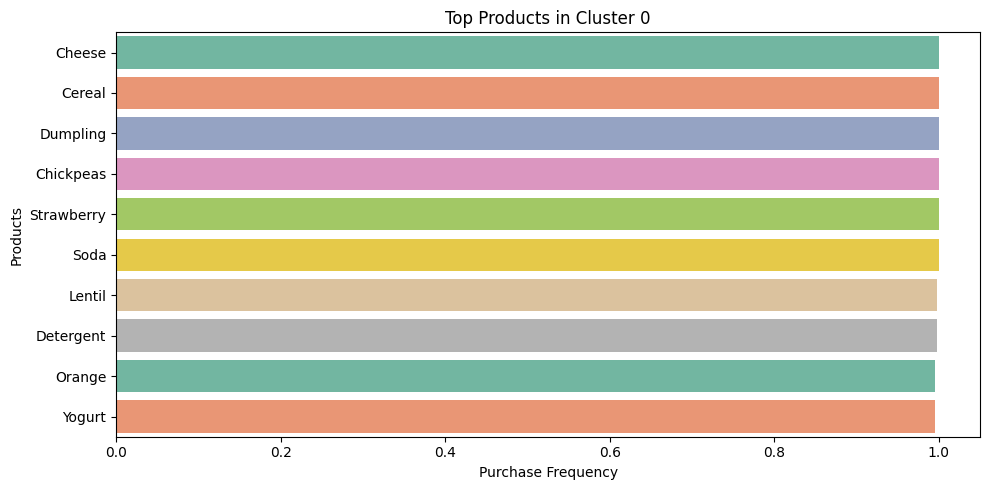

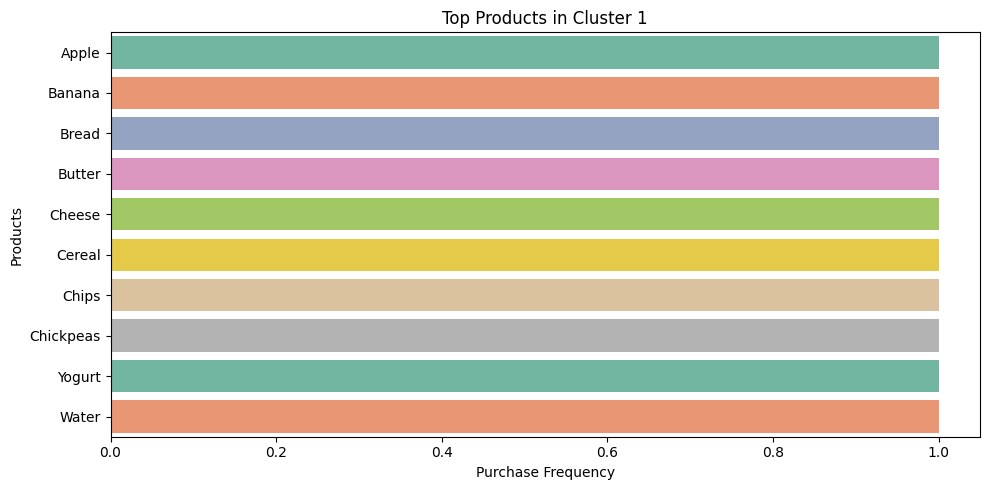

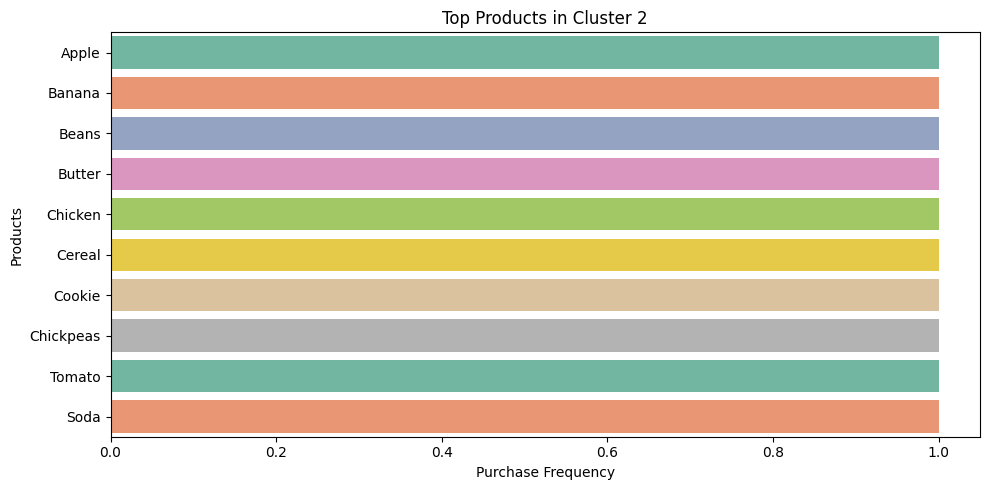

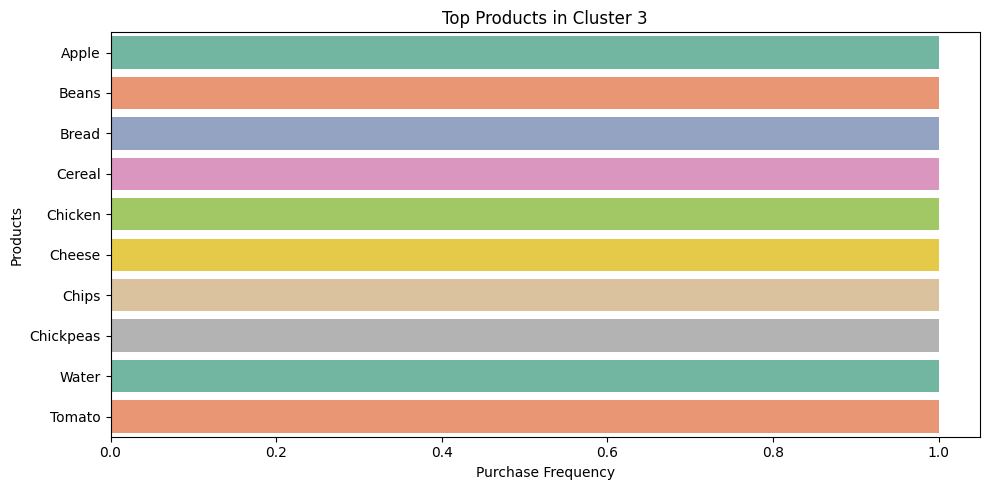

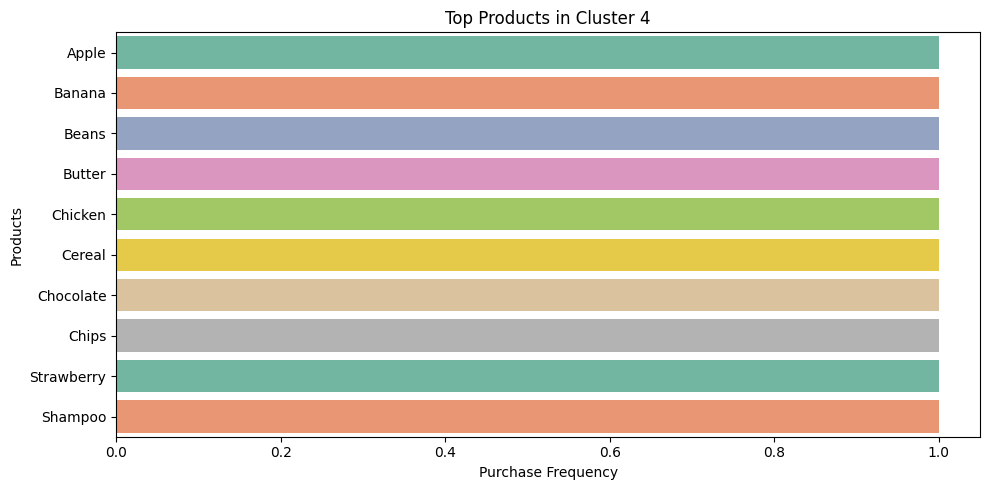

In [19]:
for cluster_id in sorted(customer_product['Cluster'].unique()):
    top_products = cluster_products[customer_product['Cluster'] == cluster_id].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_products.values, y=top_products.index, palette='Set2')
    plt.title(f"Top Products in Cluster {cluster_id}")
    plt.xlabel("Purchase Frequency")
    plt.ylabel("Products")
    plt.tight_layout()
    plt.show()

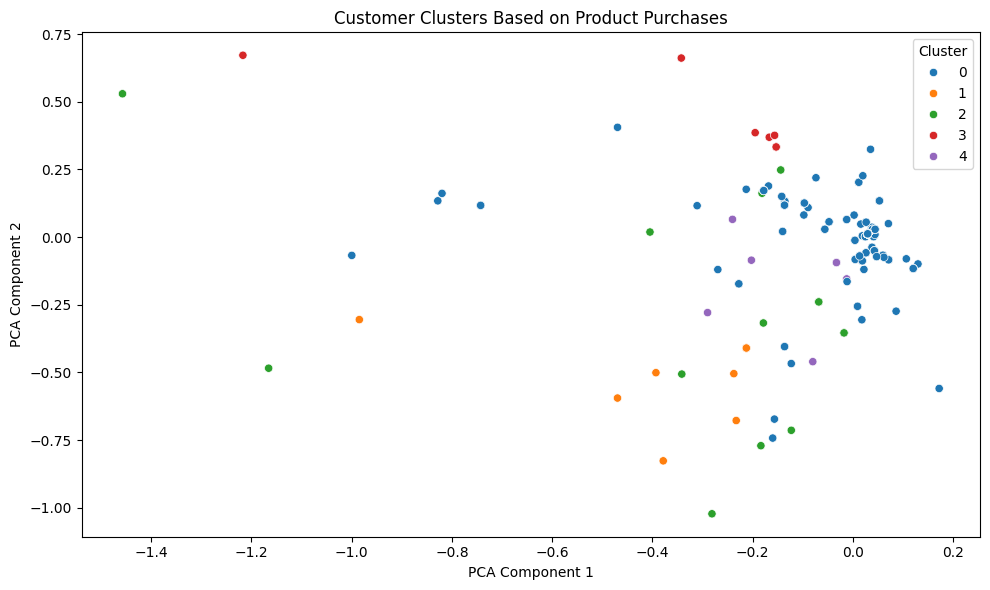

In [20]:
# Plot clusters using first two PCA components
pca_2d = PCA(n_components=2).fit_transform(customer_product.drop(columns='Cluster'))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=customer_product['Cluster'], palette='tab10')
plt.title('Customer Clusters Based on Product Purchases')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()